In [1]:
import nltk
import numpy as np
import pandas as pd
import string
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords

In [2]:
# initialize values
in_dir = 'processed'
out_dir = 'output'
# print all filename present in directory
os.listdir(in_dir)

['cleaned_data.csv',
 'ham_freq_word',
 'ham_words.csv',
 'spam_freq_word',
 'spam_words.csv',
 'tweets_all.csv',
 'tweets_ham.csv',
 'tweets_spam.csv']

In [3]:
# set the dataset file name here
data_fname = 'tweets_all.csv'
cdata_fname = 'cleaned_data.csv'

In [4]:
data_file_path = os.path.join(in_dir,data_fname)
print("Input file path : "+data_file_path)

Input file path : processed\tweets_all.csv


In [5]:
data_as_frame = pd.read_csv(data_file_path)
data_as_frame.shape

(1519, 4)

In [6]:
data_as_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1519 entries, 0 to 1518
Data columns (total 4 columns):
t_id     1519 non-null int64
text     1519 non-null object
place    1519 non-null object
label    1519 non-null object
dtypes: int64(1), object(3)
memory usage: 47.5+ KB


In [7]:
data_as_frame = data_as_frame.loc[data_as_frame['label']=='ham']

In [8]:
data_as_frame = data_as_frame.drop(columns='label',axis=1)
data_as_frame.set_index('t_id',inplace=True)

In [9]:
data_as_frame.shape

(1000, 2)

In [10]:
data_as_frame.head()

,text,place
t_id,,
0,rt morningjewshow speaking about jews and come...,RRN
1,this age face recognition thing no reason plat...,SILK
2,only upside of the moment i can think of is th...,BTM
3,if you re going to think about create experien...,SILK
4,watching a thread on fb about possible future ...,KOR


In [11]:
place = data_as_frame.drop('text',axis=1)

In [12]:
def nullAnalysis(df):
    tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})

    tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
    tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename(index={0:'null values (%)'}))
    return tab_info

In [13]:
nullAnalysis(data_as_frame)

,text,place
column type,object,object
null values (nb),0,0
null values (%),0,0


In [14]:
stopword = stopwords.words('english')
print(stopword)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [15]:
def text_process(sentence):
    # Check characters to see if they are in punctuation
    nopunc = [char for char in sentence if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [16]:
cleanup_re = re.compile('[^a-z]+')

In [17]:
def cleanup(sentence):
    sentence = str(sentence)
    sentence = sentence.lower()
    sentence = cleanup_re.sub(' ', sentence).strip()
    return sentence

In [18]:
data_as_frame['text'] = data_as_frame['text'].apply(text_process)

In [19]:
data_as_frame['text'] = data_as_frame['text'].apply(cleanup)

In [20]:
data_as_frame.to_csv('temp.csv',index=False)

In [21]:
nrc_docs = pd.read_csv('input/nrc_lexicon.csv')

In [22]:
eng_words = nrc_docs.Word.unique()

In [23]:
nrc_docs.head()

,Word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,1,0,0,0,1,0,1,0,0
3,abandoned,0,1,1,0,0,1,0,1,0,0
4,abandonment,0,1,1,0,0,1,0,1,1,0


In [24]:
nrc_docs.set_index('Word',inplace=True)

In [25]:
nrc_word_list = eng_words.tolist()

In [26]:
def get_nrc_sentiment(sentence):
    # tokenize word
    wordlist = TextBlob(sentence).words
    senti_vec = np.asarray([0,0,0,0,0,0,0,0,0,0])
    for worditem in wordlist:
        if worditem in nrc_word_list:
            senti_vec += np.asarray(nrc_docs.loc[worditem])
    return sentence, senti_vec

In [27]:
sentences = data_as_frame['text']
print(sentences)

t_id
0       rt morningjewshow speaking jews comedy tonight...
1       age face recognition thing reason platforms ch...
2       upside moment think network news booked baltim...
3       going think create experiences need broad know...
4       watching thread fb possible future ux speaker ...
7       rt thepatrickwalsh kriss kross rapped try rhym...
9       thelancearthur hotdogsladies realize anyone ev...
11      wkamaubell stand want men telling sexist eithe...
12                                 frogtosser thank becca
20                                            deray thank
21      rt iamsakuma hundreds people union square marc...
25      leadership tech oths stop sound system front p...
26      infuriating oakland pd tell authority anything...
27      best part heading toronto month hear school sy...
28      oakland tech got stadium level audio going gia...
30      twibnation grassroots media covering ground ba...
33      rt camerontw fingers crossed need good news rt...
34      g

In [28]:
from textblob import TextBlob

In [29]:
file = open("output/senti_result.csv",'w')
file.write("Sentence,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust,Label")
file.write("\n")
for sentence in sentences:
#     print(sentence)
    sent , arr = get_nrc_sentiment(sentence)
#     print(sent, arr)
    label = 'neg'
    if (arr[2] + arr[4] + arr[5] + arr[7]) < (arr[3] + arr[6] + arr[8] + arr[9]):
        label = 'pos'
    file.write(sent+","+str(arr[2])+","+str(arr[3])+","+str(arr[4])+","+str(arr[5])+","+str(arr[6])+","+str(arr[7])+","+str(arr[8])+","+str(arr[9])+","+label)
    file.write("\n")
file.close()

In [30]:
res = pd.read_csv('output/senti_result.csv')

In [31]:
res.head()

,Sentence,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust,Label
0,rt morningjewshow speaking jews comedy tonight...,1,0,0,0,0,0,0,0,neg
1,age face recognition thing reason platforms ch...,0,0,0,0,0,0,0,1,pos
2,upside moment think network news booked baltim...,0,1,0,0,0,0,0,0,pos
3,going think create experiences need broad know...,0,0,0,0,1,0,0,0,pos
4,watching thread fb possible future ux speaker ...,0,1,0,0,1,0,0,1,pos


In [32]:
res.groupby('Label').describe()

Anger                                              Anticipation  \
       count      mean       std  min  25%  50%  75%  max        count   
Label                                                                    
neg    569.0  0.332162  0.628296  0.0  0.0  0.0  1.0  4.0        569.0   
pos    431.0  0.134571  0.374150  0.0  0.0  0.0  0.0  2.0        431.0   

                ...  Surprise       Trust                                     \
           mean ...       75%  max  count      mean       std  min  25%  50%   
Label           ...                                                            
neg    0.151142 ...       0.0  2.0  569.0  0.137083  0.378348  0.0  0.0  0.0   
pos    0.844548 ...       1.0  3.0  431.0  1.053364  0.800832  0.0  1.0  1.0   

                 
       75%  max  
Label            
neg    0.0  2.0  
pos    1.0  4.0  

[2 rows x 64 columns]

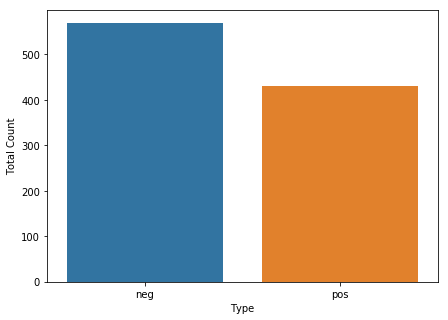

In [33]:
plt.figure(figsize=(7,5))
plt.xlabel('Type')
plt.ylabel('Total Count')
sns.barplot(res.Label.value_counts().index,res.Label.value_counts().values)
plt.show()

## Thank You

In [34]:
data = pd.concat([res, place], axis=1, join='inner')

In [35]:
data.head()

,Sentence,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust,Label,place
0,rt morningjewshow speaking jews comedy tonight...,1,0,0,0,0,0,0,0,neg,RRN
1,age face recognition thing reason platforms ch...,0,0,0,0,0,0,0,1,pos,SILK
2,upside moment think network news booked baltim...,0,1,0,0,0,0,0,0,pos,BTM
3,going think create experiences need broad know...,0,0,0,0,1,0,0,0,pos,SILK
4,watching thread fb possible future ux speaker ...,0,1,0,0,1,0,0,1,pos,KOR


In [36]:
df_pos = data[data['Label']=='pos'][['place']]
df_neg = data[data['Label']=='neg'][['place']]

In [37]:
df_pos.place.value_counts()

JPN     39
BSK     38
ATB     35
BTM     35
HSR     33
SILK    32
JNR     30
RRN     29
KOR     22
Name: place, dtype: int64

In [38]:
df_neg.place.value_counts()

SILK    47
BSK     44
RRN     44
BTM     42
KOR     40
ATB     39
JPN     39
JNR     37
HSR     34
Name: place, dtype: int64

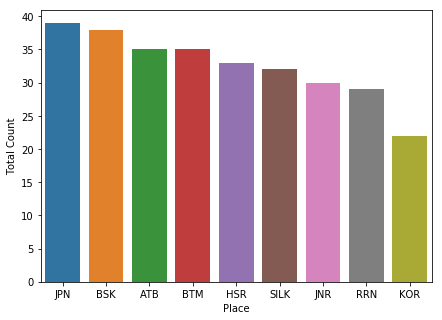

In [39]:
plt.figure(figsize=(7,5))
plt.xlabel('Place')
plt.ylabel('Total Count')
sns.barplot(df_pos.place.value_counts().index,df_pos.place.value_counts().values)
plt.show()

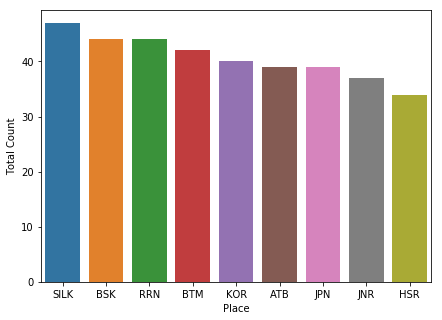

In [40]:
plt.figure(figsize=(7,5))
plt.xlabel('Place')
plt.ylabel('Total Count')
sns.barplot(df_neg.place.value_counts().index,df_neg.place.value_counts().values)
plt.show()